# Dados de clima de Piracicaba entre 1904 até 2024

Nesta página, serão abordados os dados sobre clima de Piracicaba coletados nos anos de 1904 e 2024 pela estação meteorológica da ESALQ. No caso, verificaremos a ocorrência de chuvas neste período, para verificarmos se há algum padrão de precipitação ou somente entender o comportamento das chuvas na região.

Abaixo, iremos carregar os possíveis pacotes/libraries que serão usadas para baixar os dados e realizar as análises exploratórias

In [ ]:
# Libraries
import pandas as pd
import requests
import io
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

Agora iremos baixar o conteúdo da página do GitHub contendo a planilha bruta dos dados de clima em Piracicaba. Neste chunk, há o passo a passo para localizar os dados do GitHub e transformá-lo em um link (após rodar o chunk, será gerado um link de acesso ao repositório onde estão os dados).

In [ ]:
# Definição do URL completo para a planilha no github, e inclusão
#     do parâmetro que impõe leitura dos dados brutos (?raw=true)
url_1 = "https://github.com/FlorestaR/dados/blob/main/X_PIRACLIM/"
xls_2 = "DadosClima_Piracicaba.xlsx"
prm_3 = "?raw=true"
gitFile = url_1 + xls_2 + prm_3
print (gitFile)

https://github.com/FlorestaR/dados/blob/main/X_PIRACLIM/DadosClima_Piracicaba.xlsx?raw=true


A partir deste link, podemos baixar os dados da planilha e armazená-los em uma variável (no caso, "rawFile"):

In [ ]:
# Faz o download da planilha
rawFile = requests.get(gitFile).content

Com os dados da planilha armazenados em uma nova variável, agora iremos selecionar uma das planilhas dentro do arquivo. No caso, "PiraClima".


In [ ]:
# Conversão para um pandas dataframe de uma das abas da planilha
abaData = "PiraClima"
df = pd.read_excel(rawFile, sheet_name=abaData)

É possível verificar o cabeçalho dos dados, para ter certeza de que estão corretos/foram baixados corretamente:

In [ ]:
# Exibe 5 primeiras linhas do dataframe
print (df.head())

print(df.info())

#Exibição da tabela
display(df)

    ANO  MES  DIA  TMED  URMED  VentoMED  TMAX  TMAX_hora  URMAX  URMAX_hora  \
0  1902    6    1   NaN    NaN       NaN   NaN        NaN    NaN         NaN   
1  1902    6    2   NaN    NaN       NaN   NaN        NaN    NaN         NaN   
2  1902    6    3   NaN    NaN       NaN   NaN        NaN    NaN         NaN   
3  1902    6    4   NaN    NaN       NaN   NaN        NaN    NaN         NaN   
4  1902    6    5   NaN    NaN       NaN   NaN        NaN    NaN         NaN   

   VentoMAX  VentoMAX_hora  TMIN  TMIN_hora  URMIN  URMIN_hora  Chuva  \
0       NaN            NaN   NaN        NaN    NaN         NaN    0.0   
1       NaN            NaN   NaN        NaN    NaN         NaN    0.0   
2       NaN            NaN   NaN        NaN    NaN         NaN    0.0   
3       NaN            NaN   NaN        NaN    NaN         NaN    0.0   
4       NaN            NaN   NaN        NaN    NaN         NaN    0.0   

   Rad.Glob.  Estiagem  
0        NaN         5  
1        NaN         5  
2    

,ANO,MES,DIA,TMED,URMED,VentoMED,TMAX,TMAX_hora,URMAX,URMAX_hora,VentoMAX,VentoMAX_hora,TMIN,TMIN_hora,URMIN,URMIN_hora,Chuva,Rad.Glob.,Estiagem
0,1902,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
1,1902,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
2,1902,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
3,1902,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
4,1902,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44261,2025,3,2,25.06,72.141150,1.922,31.32,1555.0,96.0,0.0,5.872,914.0,19.37,634.0,45.25,1521.0,0.000,26.88,3
44262,2025,3,3,25.33,70.766560,1.110,33.01,1538.0,100.0,454.0,4.914,1625.0,17.89,527.0,34.23,1911.0,0.000,27.03,3
44263,2025,3,4,26.29,77.198229,0.999,33.54,1336.0,100.0,452.0,5.872,1350.0,19.57,630.0,43.07,1433.0,0.000,24.98,3
44264,2025,3,5,26.18,80.532917,1.377,33.30,1630.0,100.0,200.0,6.591,2238.0,21.54,2359.0,49.71,1630.0,29.210,23.60,0


Com as informações do dataset acima, é possível observar que há 44266 entradas/observações com 19 colunas/variáveis.

A variável então a ser analisada será "Chuva". Aqui, vamos observar a estrutura de informações dessa variável.

In [ ]:
chuva = df['Chuva']

print(chuva.head())

print(chuva.mean())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Chuva, dtype: float64
3.494784663174841


Para analisar os períodos de chuvas no decorrer dos anos, devemos primeiramente entender essa variável. De acordo com a planilha, há dados desde 1902, apesar de que há dados vazios (NAs). Abaixo, verificaremos as classes de algumas variáveis

In [ ]:
# verificando as classes de variaveis
rain_dtype = df['Chuva'].dtype
print(rain_dtype)

year_dtype = df['ANO'].dtype
print(year_dtype)



float64
int64


Agora, para verificar a chuva ao longo do tempo por meio de gráficos para visualizar o comportamento de chuvas.

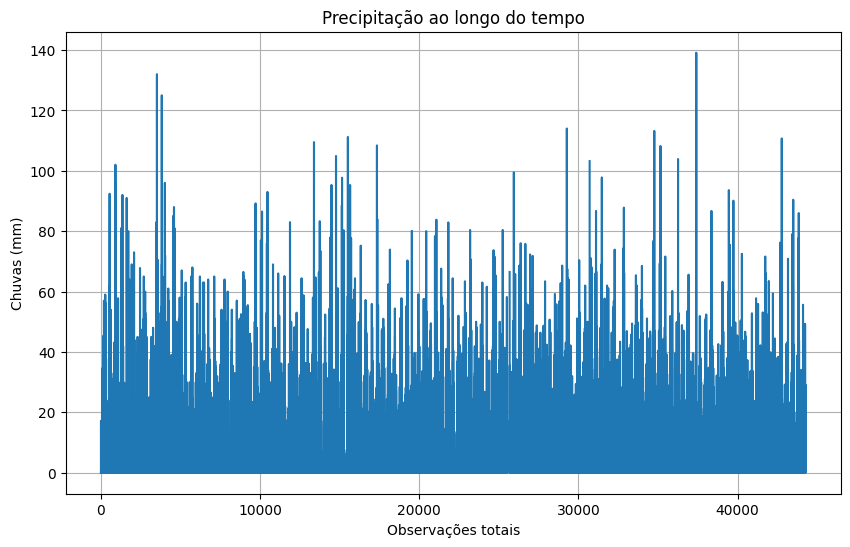

In [ ]:
# plotando a coluna de chuva e total de observacoes
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Chuva'])
plt.title('Precipitação ao longo do tempo')
plt.xlabel('Observações totais')
plt.ylabel('Chuvas (mm)')
plt.grid(True)
plt.show()


Realizando agora algumas medidas estatísticas para entender a variável chuva:

In [ ]:
# verificacao de medidas centrais da var chuva
mean_rainfall = df['Chuva'].mean()
median_rainfall = df['Chuva'].median()
max_rainfall = df['Chuva'].max()
min_rainfall = df['Chuva'].min()
std_dev_rainfall = df['Chuva'].std()

# visualizando os resultados
print("Mean Rainfall:", mean_rainfall)
print("Median Rainfall:", median_rainfall)
print("Maximum Rainfall:", max_rainfall)
print("Minimum Rainfall:", min_rainfall)
print("Standard Deviation of Rainfall:", std_dev_rainfall)

Mean Rainfall: 3.494784663174841
Median Rainfall: 0.0
Maximum Rainfall: 139.1
Minimum Rainfall: 0.0
Standard Deviation of Rainfall: 9.375153649982037


Para verificar a precipitação ao longo do tempo, será necessário criar uma variável que contenha todas as informações de data (ANO, MES, DIA). Irei remover o excesso de dados que podem poluir o gráfico.

In [ ]:
# renomeando as variaveis ano, mes e dia

df = df.rename(columns={'ANO': 'year', 'MES': 'month', 'DIA': 'day'})

In [ ]:
display(df)

,year,month,day,TMED,URMED,VentoMED,TMAX,TMAX_hora,URMAX,URMAX_hora,VentoMAX,VentoMAX_hora,TMIN,TMIN_hora,URMIN,URMIN_hora,Chuva,Rad.Glob.,Estiagem
0,1902,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
1,1902,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
2,1902,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
3,1902,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
4,1902,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44261,2025,3,2,25.06,72.141150,1.922,31.32,1555.0,96.0,0.0,5.872,914.0,19.37,634.0,45.25,1521.0,0.000,26.88,3
44262,2025,3,3,25.33,70.766560,1.110,33.01,1538.0,100.0,454.0,4.914,1625.0,17.89,527.0,34.23,1911.0,0.000,27.03,3
44263,2025,3,4,26.29,77.198229,0.999,33.54,1336.0,100.0,452.0,5.872,1350.0,19.57,630.0,43.07,1433.0,0.000,24.98,3
44264,2025,3,5,26.18,80.532917,1.377,33.30,1630.0,100.0,200.0,6.591,2238.0,21.54,2359.0,49.71,1630.0,29.210,23.60,0


Agora iremos juntar as informações de data em uma só coluna:

In [ ]:
df['Date']=pd.to_datetime(df[['year','month','day']])

display(df)

,year,month,day,TMED,URMED,VentoMED,TMAX,TMAX_hora,URMAX,URMAX_hora,VentoMAX,VentoMAX_hora,TMIN,TMIN_hora,URMIN,URMIN_hora,Chuva,Rad.Glob.,Estiagem,Date
0,1902,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,1902-06-01
1,1902,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,1902-06-02
2,1902,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,1902-06-03
3,1902,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,1902-06-04
4,1902,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,1902-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44261,2025,3,2,25.06,72.141150,1.922,31.32,1555.0,96.0,0.0,5.872,914.0,19.37,634.0,45.25,1521.0,0.000,26.88,3,2025-03-02
44262,2025,3,3,25.33,70.766560,1.110,33.01,1538.0,100.0,454.0,4.914,1625.0,17.89,527.0,34.23,1911.0,0.000,27.03,3,2025-03-03
44263,2025,3,4,26.29,77.198229,0.999,33.54,1336.0,100.0,452.0,5.872,1350.0,19.57,630.0,43.07,1433.0,0.000,24.98,3,2025-03-04
44264,2025,3,5,26.18,80.532917,1.377,33.30,1630.0,100.0,200.0,6.591,2238.0,21.54,2359.0,49.71,1630.0,29.210,23.60,0,2025-03-05


Como o grafico acima possuia muitas informações, filtraremos os dados de 30 anos atrás (por isso a variável Date foi criada).

In [ ]:
from datetime import datetime, timedelta

# calculo de 30 anos atras
date_30 = datetime.now() - timedelta(days=30*365)

# dataset com dados de 30 anos atras
df_30 = df[df['Date'] >= date_30]

display(df_30)

,year,month,day,TMED,URMED,VentoMED,TMAX,TMAX_hora,URMAX,URMAX_hora,VentoMAX,VentoMAX_hora,TMIN,TMIN_hora,URMIN,URMIN_hora,Chuva,Rad.Glob.,Estiagem,Date
33389,1994,5,8,22.30,77.000000,6.500,29.80,NaN,NaN,NaN,6.200,NaN,14.80,NaN,NaN,NaN,0.000,NaN,16,1994-05-08
33390,1994,5,9,23.10,77.000000,6.000,29.60,NaN,NaN,NaN,5.200,NaN,16.60,NaN,NaN,NaN,0.000,NaN,16,1994-05-09
33391,1994,5,10,23.80,73.000000,7.800,31.60,NaN,NaN,NaN,11.200,NaN,16.00,NaN,NaN,NaN,0.000,NaN,16,1994-05-10
33392,1994,5,11,24.70,68.000000,7.500,29.90,NaN,NaN,NaN,8.700,NaN,19.50,NaN,NaN,NaN,0.000,NaN,16,1994-05-11
33393,1994,5,12,19.60,86.000000,4.600,22.80,NaN,NaN,NaN,6.000,NaN,16.30,NaN,NaN,NaN,0.000,NaN,16,1994-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44261,2025,3,2,25.06,72.141150,1.922,31.32,1555.0,96.0,0.0,5.872,914.0,19.37,634.0,45.25,1521.0,0.000,26.88,3,2025-03-02
44262,2025,3,3,25.33,70.766560,1.110,33.01,1538.0,100.0,454.0,4.914,1625.0,17.89,527.0,34.23,1911.0,0.000,27.03,3,2025-03-03
44263,2025,3,4,26.29,77.198229,0.999,33.54,1336.0,100.0,452.0,5.872,1350.0,19.57,630.0,43.07,1433.0,0.000,24.98,3,2025-03-04
44264,2025,3,5,26.18,80.532917,1.377,33.30,1630.0,100.0,200.0,6.591,2238.0,21.54,2359.0,49.71,1630.0,29.210,23.60,0,2025-03-05


Apresentando então os dados de precipitação dos últimos 30 anos:

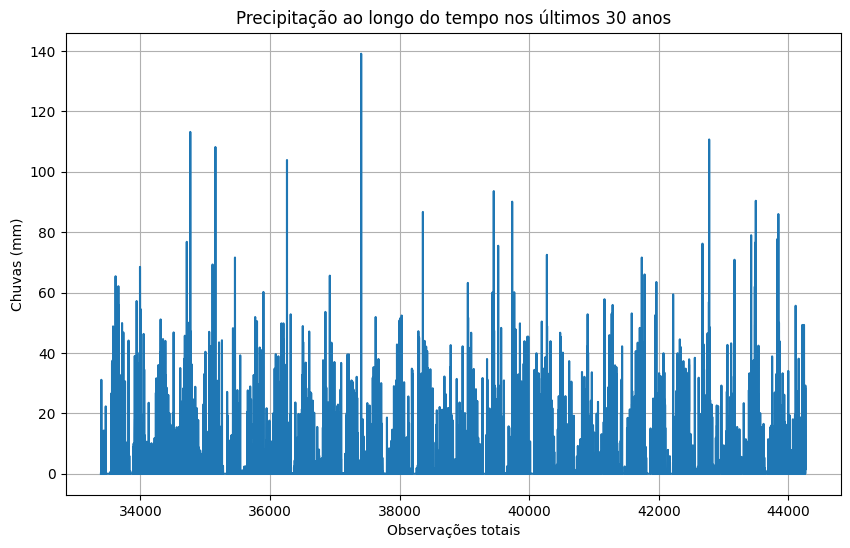

In [ ]:
# precipitacao dos ultimos 30 anos
plt.figure(figsize=(10, 6))
plt.plot(df_30.index, df_30['Chuva'])
plt.title('Precipitação ao longo do tempo nos últimos 30 anos')
plt.xlabel('Observações totais')
plt.ylabel('Chuvas (mm)')
plt.grid(True)
plt.show()

Plotando um gráfico considerando as médias por ano:

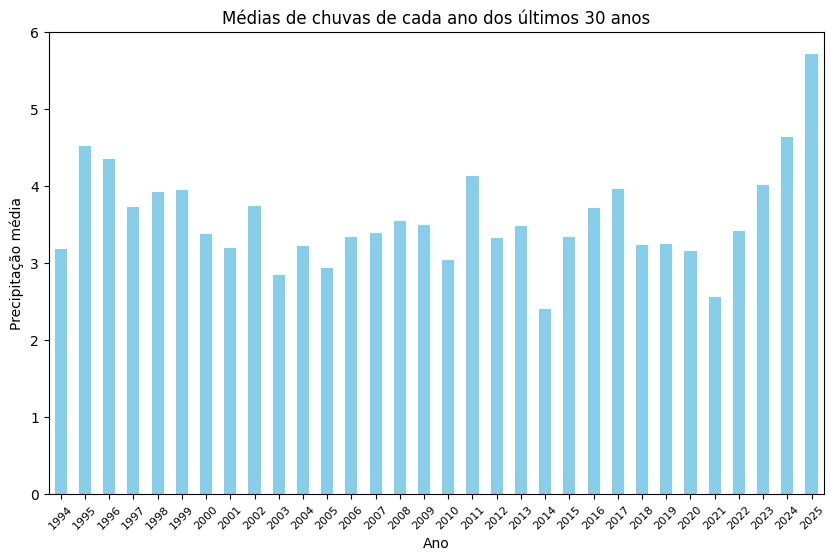

In [ ]:
mean_rain_per_year = df_30.groupby('year')['Chuva'].mean()

# grafico de medias de chuva dos ultimos 30 anos
plt.figure(figsize=(10, 6))
mean_rain_per_year.plot(kind='bar', color='skyblue')
plt.title('Médias de chuvas de cada ano dos últimos 30 anos')
plt.xlabel('Ano')
plt.ylabel('Precipitação média')
plt.xticks(rotation=45)
plt.xticks(rotation=45, fontsize=8)
plt.show()

Apesar de ter ocorrido algum erro durante a captura dos dados (há o ano de 2025, o que leva a conclusão de que talvez tenha ocorrido adiantamento de um ano durante a avaliação e armazenamento dos dados), podemos observar que as precipitações vêm aumentando nos últimos 4 anos.